Here's some math on the risk of diminishing returns on pack openings from the outstanding card issue.  The intent is *not* to defend the Vault or the amount of uncertainty that has surrounded its retirement.  (If you'll allow me a brief soap-box, the latter is particularly disappointing to me.)  Rather it is to give some perspective on the expected magnitude of the problem for various levels of collection progress and some insight for how well various crafting strategies are able to mitigate it.

## TL;DR

0. I'm reasonably confident in these results, but they are not guaranteed to be bug-free. **Keep that in mind if you're making decisions based on them.**
1. We still have no solid info on the exact replacement system, its timeline, or how the transition will happen (particularly in regards to partial or full retroactivity). **Holding off on spending may be worthwhile if this uncertainty bothers you.**
2. Depending on your definition of "too much", your crafting strategy, and exactly how many cards you're ever likely to be interested in, you can open 100-200 packs of a single set without losing too much value to the vault relative to what they have stated is the most likely replacement.  This figure is for a fresh account with only the 15 NPE decks collected.  See the figures below for justification.
3. If you can live with the inconsistency, refraining from collecting full playsets until late in the process can make you a bit more resistant to diminishing returns.  For more info, compare "3 then 4 playset crafting" or "Bulk crafting" with "Playset-by-playset" crafting in the figures below.
4. I'm only speaking of the expectation of the total effect size during the course of collection building under a couple different strategies. **You will still occasionally be unlucky and hit 5th cards, and this is already reflected in the results.** You may also be above or below the overall expectation for diminishing returns.
5. This is for pack opening.  **Consistently raredrafting cards that the draft AI passes often obviously exposes you to more 5th copies.**  Limited in general has a higher ratio of random cards to wild cards. Those building collections primarily with constructed event ICRs also have a higher ratio of random cards to wild cards, but it's helped by them being spread over all 5 sets compared to packs or draft. If someone has reliable data about the number of cards they get relative to the number of packs they get and their relative rarities from non-booster methods of acquisition, I'm happy to rerun the analysis.
6. **Imagining every single 5th copy you get as being robbed of a substantial portion of the card you want most is missing the forest for the trees; the diminishing returns on collection is inarguably a problem, but half-complete comparisons to other systems potentially lead to that feedback being dismissed by the powers-that-be for being based on counterfactual assumptions, implicit or otherwise.**  I sometimes like to think of this as "Schrödinger's pack value": I've heard both of the following fairly often: (1) the vast majority of the value of packs is in wildcards and (2) getting any 5th copies means losing a catastrophic amount of value.  In reality, wildcards and random cards must be considered *together* to get a complete picture.  Even Limited players and constructed event players have some interaction with wildcards via Limited prizes, the weekly pack quest, and/or not spending 100% of resources on event entries.


### Crafting Methods Considered

1. **Bulk Crafting**: Open packs until enough wildcards are acquired to craft the all of the desired playsets, then spend them all at once at the end.
2. **Playset-by-playset**: Open packs until enough wildcards are acquired to craft the first desired playset, craft it.  Repeat until all playsets are complete.
3. **3 then 4 playset**: Open packs until enough wildcards to craft 3 of the first desired playset.  Repeat until at least 3 copies of all desired cards.  Then go back at fill in the 4th copy playset-by-playset.

### Why duplicate prevention is a good benchmark/control for this type of analysis

1. Last we heard, this is still the most likely replacement to the Vault.  This is at least a minor piece of evidence that it is roughly consistent with their vision for progression rates after the Vault is retired.
2. It has the desireable property for a benchmark assessing diminishing returns that its rate of progression is relatively constant in all collection states. 
3. Many other proposals change the balance between random cards and wildcards at a certain point in collection progress.  That's good in some sense but unrealistic in another sense as many systems, e.g. ICRs, are built around relative abundance of random cards and therefore such proposals would most likely be accompanied by other adjustments to the economy elsewhere.  It muddies the waters by mixing *"the way 5th cards work eventually causes an unacceptable level of diminishing returns"* (clearly a very strong mandate) with *"give me more free stuff"* or *"I want full dusting economy and dismiss the potential upsides of nondestructive crafting"* (a certain base level of support, but not as universally true).

### How to read the graphs

Each scenario shows collection of a specific set of rares (x4) from a set by opening packs of that set with the results shown in two graphs.

The first shows the average number of rares from the desired set at each pack opened until all simulated iterations finished the desired set.

The second shows a moving average (right-aligned, width 30 packs) of the pack-by-pack change in the curve in the first graph.  The dashed lines show the overall average per pack (calculated as $y \div x$ from the last point of each curve on the first graph)

In [1]:
using ArenaSim
using Statistics
using PyCall
using PyPlot
using Colors
using Random

In [2]:
include("utilfunctions.jl");

In [3]:
Random.seed!(12345);

### Scenario 1: GRN Rares more than \$1

https://scryfall.com/search?q=e%3Agrn+r%3Ar+usd%3E%3D1.0&unique=cards&as=checklist&order=set

The pink "3 then 4" line stays on track with the duplicate prevention version of the aggressive crafting strategy until $\approx 125$ packs.  By the time the aggressive crafting strategy with no duplicates would be expected to finish all the desired rares (around 215 packs), this strategy is only a couple rares short that could be finished off with wildcards acquired while opening other sets or left incomplete if a particular deck strategy is unappealing.

Bulk crafters lose roughly 10% of value to the vault relative to the optimal orange line.

Aggressively crafting playsets in the current system sets you back a further 50 packs or so, although again, there is a long tail of a couple needed cards that is better finished off from wildcards acquired while opening other sets if avoiding 5th copies is paramount.

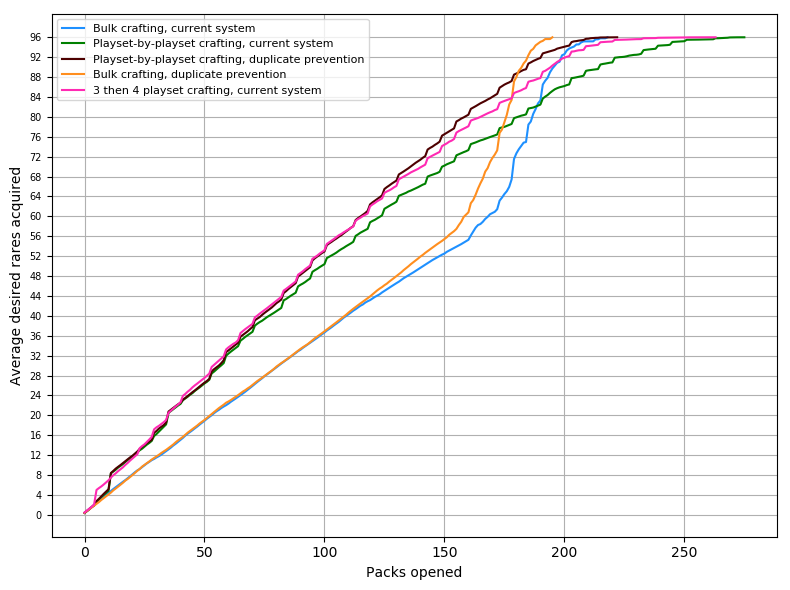

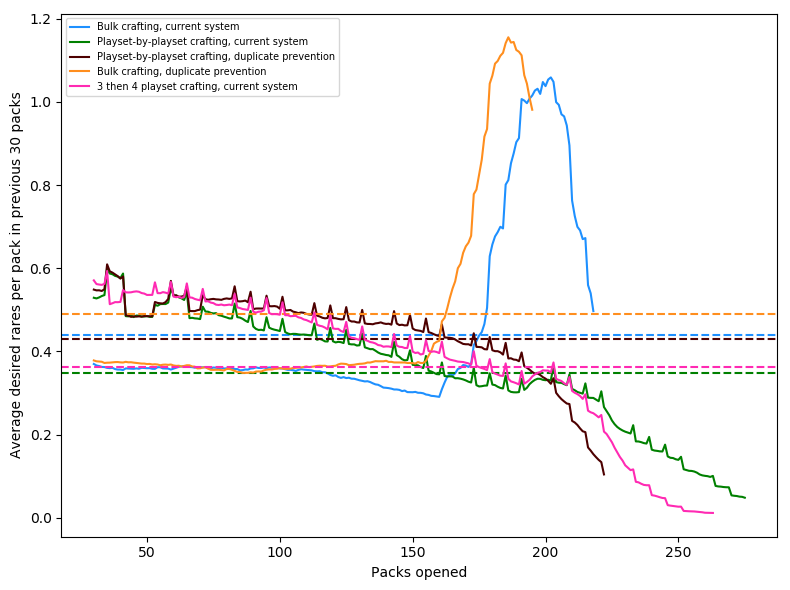

In [4]:
case(ff2_grn, ArenaSim.next_set_grn!, [:GRN]; nsim = 200)

### Scenario 2: All GRN Rares

https://scryfall.com/search?q=e%3Agrn+r%3Ar+is%3Abooster&unique=cards&as=checklist&order=set

When all rares are desired, crafting strategy is essentially irrelevant with duplicate prevention.  This is a nice property!

Bulk crafting all these rares with the vault costs roughly 50 extra packs relative to no duplicates.

The aggressive spending strategies lose even more, again with the long-tail phenomenon discussed above.

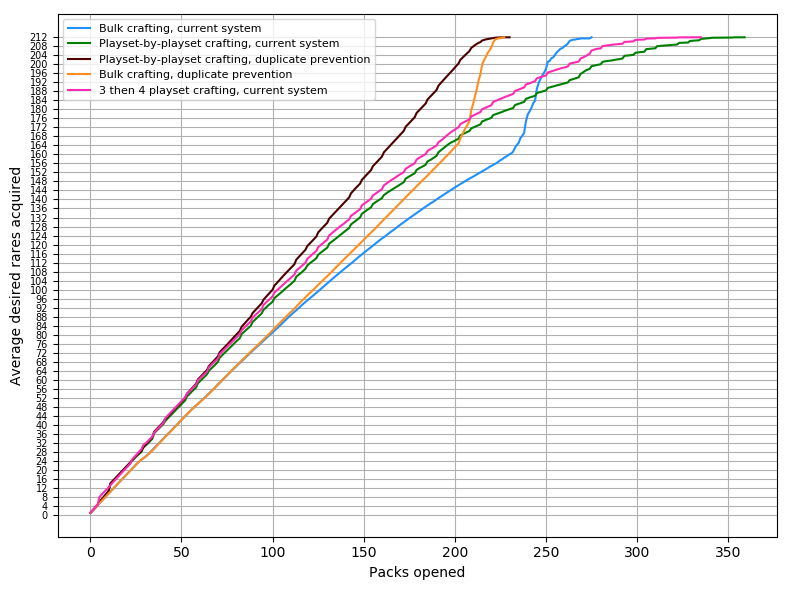

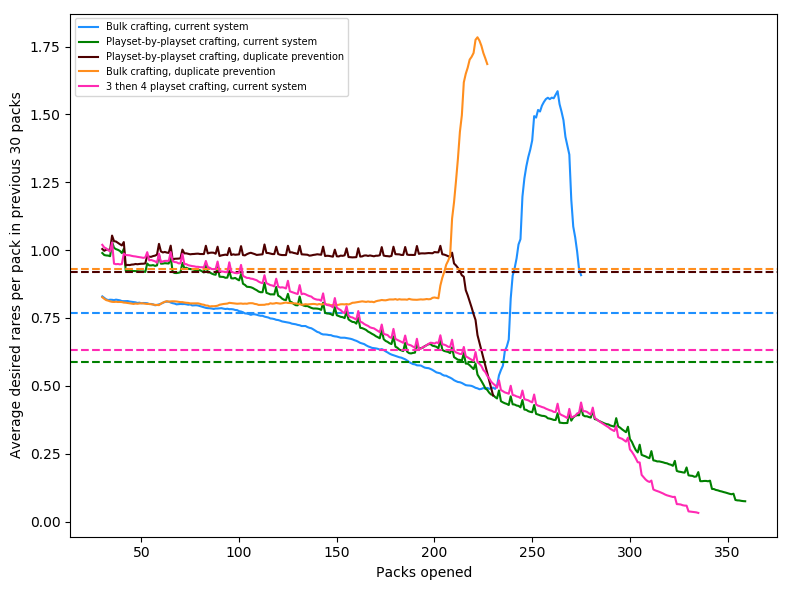

In [5]:
case(ff1_grn, ArenaSim.next_set_grn!, [:GRN])

### Scenario 3: DOM Rares Above \$1

https://scryfall.com/search?q=e%3Adom+r%3Ar+usd%3E%3D1.0+is%3Abooster&unique=cards&as=checklist&order=set

There are few enough rares here that the vault isn't *too* big of a problem in most cases.  The bulk crafting strategy with the Vault is roughly equivalent to never getting duplicates.  Even the greedier crafting strategies can be mostly finished within that same range.

One wrinkle with "competitive DOM rares" is there are relatively few of them compared to mythics.  GRN also has several mythics that are often played as 4-ofs, but it has enough rares that the mythics are often taken care of automatically by the time that the rares are done.  Excess Mythic Wildcards from other decks that are rare-limited may need to be lent to DOM's mythics to stay efficient here.

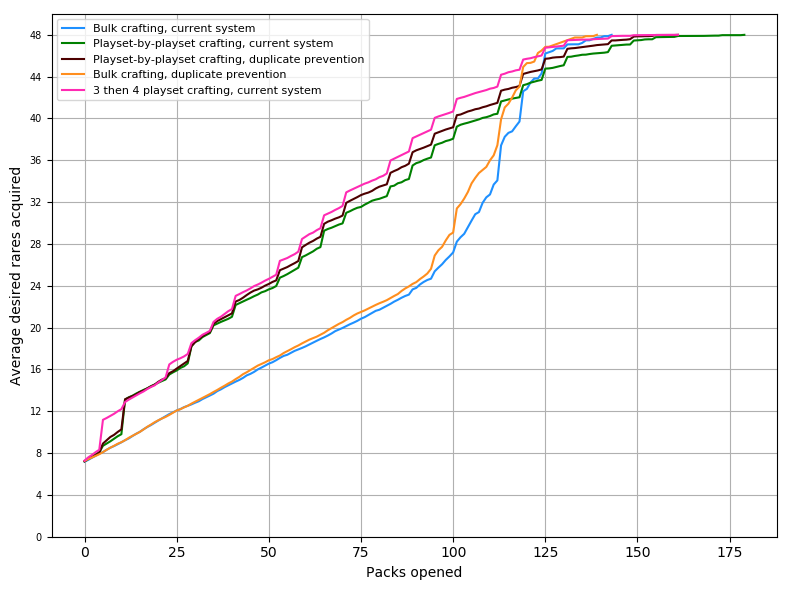

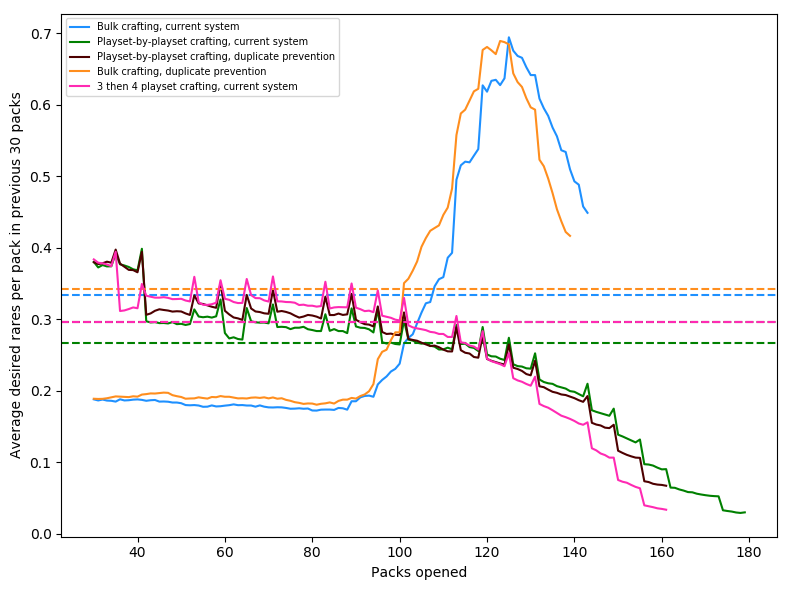

In [6]:
case(ff2_dom, ArenaSim.next_set_dom!, [:DOM])

### Scenario 4: XLN Rares Above \$1

https://scryfall.com/search?q=e%3Axln+r%3Ar+usd%3E%3D1.0+is%3Abooster&unique=cards&as=checklist&order=set

Similar story to GRN here in terms of number of rares.  XLN being an older set with some cards that seem like their value is more driven by non-Standard formats, this may be overly optimistic in terms of how many of those $1+ rares are likely to be useful in Arena right now

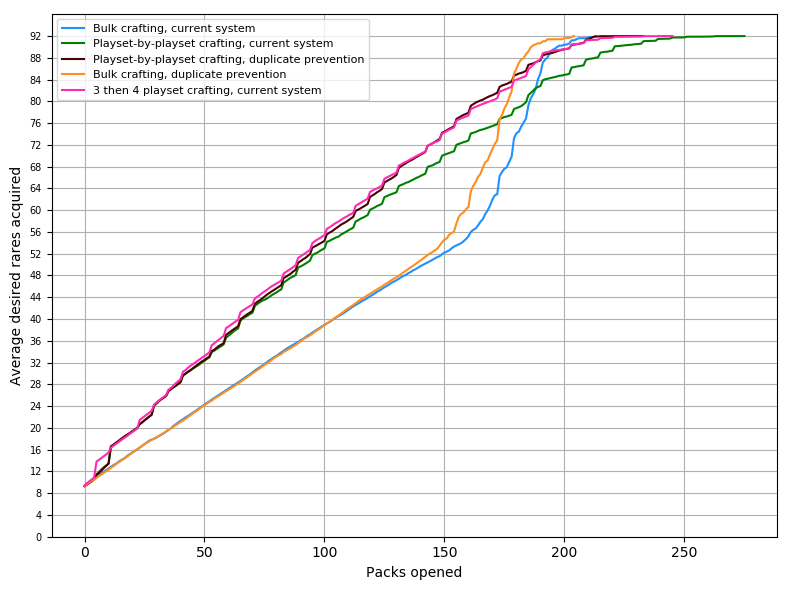

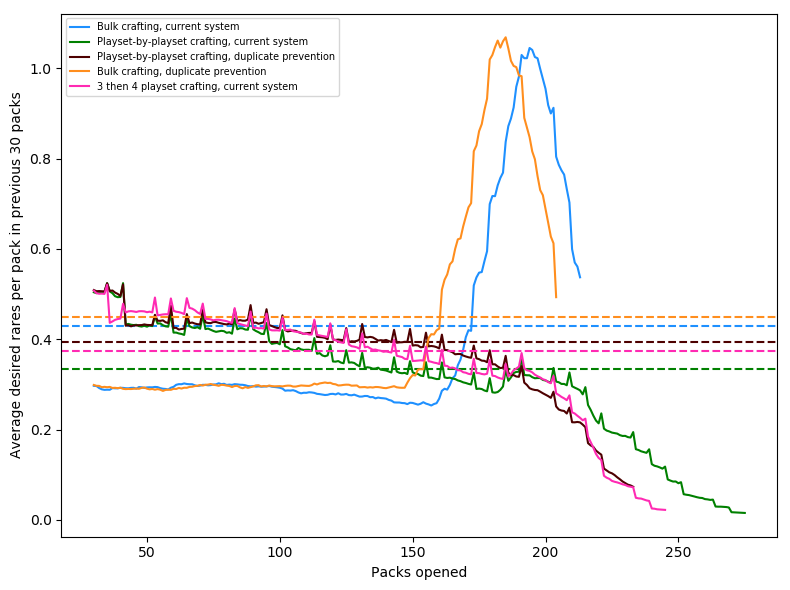

In [7]:
case(ff2_xln, ArenaSim.next_set_xln!, [:XLN])

### Bonus Comparative Research About Hearthstone

While researching this topic, I found some work from other theorycrafters that may help put some of this in perspective.  

https://www.reddit.com/r/hearthstone/comments/6izw1f/i_wrote_a_script_that_opens_counts_packs_till_you/djai6da/

Shows that diminishing returns happens even with dust.  

https://www.reddit.com/r/hearthstone/comments/7bs77g/hearthstones_bang_for_buck_analysis/

Shows some pack requirements for various sets of Hearthstone cards.  (Remember that HS packs are more expensive in both $ and time, more so for the latter than the former).
